In [1]:
# https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer


In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat"

cols = ['age','sex','chestpain','restBP','chol','sugar','ecg',
        'maxhr','angina','dep','exercise','fluor','thal','diagnosis']
table = pd.read_csv(url, sep='\s+', names=cols)
table.head()

table.describe()


,age,sex,chestpain,restBP,chol,sugar,ecg,maxhr,angina,dep,exercise,fluor,thal,diagnosis
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [3]:
diagnosis = table['diagnosis']
features = table.drop(columns="diagnosis")

features.head()

,age,sex,chestpain,restBP,chol,sugar,ecg,maxhr,angina,dep,exercise,fluor,thal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0


In [4]:
# https://pbpython.com/categorical-encoding.html
nominals = ['chestpain','ecg','thal']
features_hot =  pd.get_dummies(features, columns=nominals)
features_hot.head()

,age,sex,restBP,chol,sugar,maxhr,angina,dep,exercise,fluor,chestpain_1.0,chestpain_2.0,chestpain_3.0,chestpain_4.0,ecg_0.0,ecg_1.0,ecg_2.0,thal_3.0,thal_6.0,thal_7.0
0,70.0,1.0,130.0,322.0,0.0,109.0,0.0,2.4,2.0,3.0,0,0,0,1,0,0,1,1,0,0
1,67.0,0.0,115.0,564.0,0.0,160.0,0.0,1.6,2.0,0.0,0,0,1,0,0,0,1,0,0,1
2,57.0,1.0,124.0,261.0,0.0,141.0,0.0,0.3,1.0,0.0,0,1,0,0,1,0,0,0,0,1
3,64.0,1.0,128.0,263.0,0.0,105.0,1.0,0.2,2.0,1.0,0,0,0,1,1,0,0,0,0,1
4,74.0,0.0,120.0,269.0,0.0,121.0,1.0,0.2,1.0,1.0,0,1,0,0,0,0,1,1,0,0


In [5]:
features_norm = features_hot;
features_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(features_norm)
features_norm.head()

,age,sex,restBP,chol,sugar,maxhr,angina,dep,exercise,fluor,chestpain_1.0,chestpain_2.0,chestpain_3.0,chestpain_4.0,ecg_0.0,ecg_1.0,ecg_2.0,thal_3.0,thal_6.0,thal_7.0
0,0.108966,0.001557,0.202366,0.501245,0.0,0.169676,0.000000,0.003736,0.003113,0.004670,0.0,0.000000,0.000000,0.001557,0.00000,0.0,0.001557,0.001557,0.0,0.000000
1,0.073417,0.000000,0.126014,0.618014,0.0,0.175323,0.000000,0.001753,0.002192,0.000000,0.0,0.000000,0.001096,0.000000,0.00000,0.0,0.001096,0.000000,0.0,0.001096
2,0.096889,0.001700,0.210777,0.443651,0.0,0.239674,0.000000,0.000510,0.001700,0.000000,0.0,0.001700,0.000000,0.000000,0.00170,0.0,0.000000,0.000000,0.0,0.001700
3,0.112636,0.001760,0.225273,0.462865,0.0,0.184794,0.001760,0.000352,0.003520,0.001760,0.0,0.000000,0.000000,0.001760,0.00176,0.0,0.000000,0.000000,0.0,0.001760
4,0.125381,0.000000,0.203321,0.455778,0.0,0.205015,0.001694,0.000339,0.001694,0.001694,0.0,0.001694,0.000000,0.000000,0.00000,0.0,0.001694,0.001694,0.0,0.000000


In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(features, annot=True)
plt.show()

<Figure size 640x480 with 2 Axes>

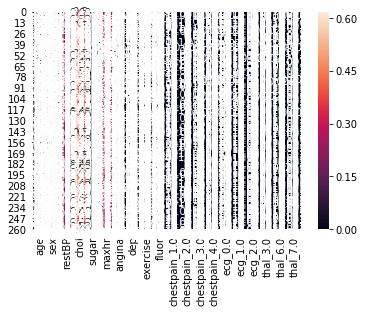

In [8]:
sns.heatmap(features_norm, annot=True)
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=2, init='k-means++').fit(features_norm)
centroids = kmeans.cluster_centers_
print(centroids)

[[9.14485282e-02 9.87505099e-04 2.12846341e-01 4.59236889e-01
  2.04511894e-04 2.23855656e-01 7.12365409e-04 1.84623879e-03
  2.68224994e-03 1.33483532e-03 6.40593845e-05 2.08304887e-04
  3.63688271e-04 9.78907555e-04 6.39205907e-04 1.19069165e-05
  9.63847273e-04 8.29120160e-04 5.40811248e-05 7.31758813e-04]
 [9.32781021e-02 1.32317850e-03 2.30629987e-01 3.84107541e-01
  2.80612414e-04 2.79165074e-01 4.41263119e-04 1.74351089e-03
  2.73553322e-03 9.51803930e-04 1.74178118e-04 3.09434468e-04
  6.14508606e-04 6.83010056e-04 1.00896033e-03 1.26270917e-05
  7.59543833e-04 1.06631711e-03 1.23401481e-04 5.91412656e-04]]


In [13]:
clusters = kmeans.predict(features_norm)
clusters

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0], dtype=int32)

In [11]:
table_norm['kMeans'] = clusters 

In [12]:
table_norm

,age,sex,restBP,chol,sugar,maxhr,angina,dep,exercise,fluor,...,chestpain_2.0,chestpain_3.0,chestpain_4.0,ecg_0.0,ecg_1.0,ecg_2.0,thal_3.0,thal_6.0,thal_7.0,kMeans
0,0.108628,0.001552,0.201738,0.499690,0.000000,0.169150,0.000000,0.003724,0.003104,0.004655,...,0.000000,0.000000,0.001552,0.000000,0.0,0.001552,0.001552,0.000000,0.000000,1
1,0.073336,0.000000,0.125876,0.617338,0.000000,0.175131,0.000000,0.001751,0.002189,0.000000,...,0.000000,0.001095,0.000000,0.000000,0.0,0.001095,0.000000,0.000000,0.001095,1
2,0.096561,0.001694,0.210063,0.442148,0.000000,0.238862,0.000000,0.000508,0.001694,0.000000,...,0.001694,0.000000,0.000000,0.001694,0.0,0.000000,0.000000,0.000000,0.001694,1
3,0.112439,0.001757,0.224877,0.462052,0.000000,0.184469,0.001757,0.000351,0.003514,0.001757,...,0.000000,0.000000,0.001757,0.001757,0.0,0.000000,0.000000,0.000000,0.001757,1
4,0.125169,0.000000,0.202977,0.455007,0.000000,0.204668,0.001691,0.000338,0.001691,0.001691,...,0.001691,0.000000,0.000000,0.000000,0.0,0.001691,0.001691,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.087764,0.001688,0.290295,0.335865,0.001688,0.273418,0.000000,0.000844,0.001688,0.000000,...,0.000000,0.001688,0.000000,0.001688,0.0,0.000000,0.000000,0.000000,0.001688,0
266,0.072607,0.001650,0.198020,0.433993,0.000000,0.285479,0.000000,0.000000,0.001650,0.000000,...,0.001650,0.000000,0.000000,0.001650,0.0,0.000000,0.000000,0.000000,0.001650,0
267,0.086114,0.000000,0.215285,0.452099,0.000000,0.235276,0.000000,0.001999,0.003076,0.000000,...,0.001538,0.000000,0.000000,0.000000,0.0,0.001538,0.001538,0.000000,0.000000,1
268,0.104702,0.001837,0.257164,0.352682,0.000000,0.271859,0.000000,0.000735,0.003674,0.000000,...,0.000000,0.000000,0.001837,0.001837,0.0,0.000000,0.000000,0.001837,0.000000,0


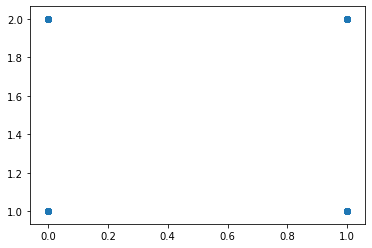

In [14]:
plt.scatter(clusters, diagnosis)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

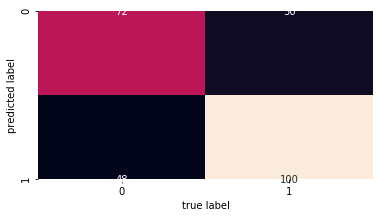

In [27]:
diagnosis = [1 if d==0 else 0 for d in diagnosis[:]-1]
mat = confusion_matrix(diagnosis, clusters)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label');
plt.ylabel('predicted label');

In [26]:
print(classification_report(diagnosis, clusters))

              precision    recall  f1-score   support

           0       0.59      0.60      0.60       120
           1       0.68      0.67      0.67       150

    accuracy                           0.64       270
   macro avg       0.63      0.63      0.63       270
weighted avg       0.64      0.64      0.64       270



0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: diagnosis, Length: 270, dtype: int64